In [23]:
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [65]:
latitude = [43.98, 42.81, 41.31, 41.18, 41.35, 41.82, 44.48, 43.66, 42.87, 41.48, 41.35, 41.88, 42.39, 41.95, 41.77, 42.76, 44, 41.29, 41.07, 41.16, 41.61, 41.44, 41.45, 41.76, 44.77, 44.9, 44.36, 44, 42.35, 42.55, 42.16, 42.11, 41.72, 42.06, 42.12, 42.09, 43.2, 43.04, 42.96, 43, 41.78, 41.92]

longitude = [-75.91, -73.94, -72.92, -73.19, -72.14, -71.41, -73.21, -70.26, -72.87,-72.52,-72.14, -71.11, -71.08, -70.66, -70.51, -72.51, -69.67, -73.11, -73.52, -73.23, -72.61, -71.98, -72.86, -72.08, -70.56, -68.77, -68.7, -70.01, -70.91,-70.93, -71.99, -71.71, -71.1, -72.71, -71.42, -72.43, -71.34, -70.95, -70.89, -71.46, -71.47, -71.57]

file = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/GenericBatchFileWithInfo.csv')
em_info = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/StateRatesInfo.csv')

# origional rates in lbs/kWh so convert them to be in tons/MWh to be consistent
BIT_carb = 2.26  / 0.001 / 2000 
NG_carb = 0.97  / 0.001 / 2000 
WND_carb = 0
RFO_carb = 2.46 / 0.001 / 2000 
NUC_carb = 0

# cost_nature = 185 / 1.102

num_gen = 42

# store fuel type of each generator
fuel_type = file['Fuel Type'].to_numpy()
cost_biden = 51 / 1.102
cost_nature = 185 / 1.102

state = file['stid'].to_numpy()
w = np.zeros((4,42))
# print(state[i])
for i in range(num_gen):
    em = em_info.loc[em_info['State ID'] == state[i], ['Fuel Type','Emissions Type', 'Emissions Rate']]
    em = em.loc[em['Fuel Type'] == fuel_type[i], ['Emissions Type', 'Emissions Rate']].to_numpy()

    w[0,i] = em[0][1] / 2000
    w[1,i] = em[1][1] / 2000
    w[2,i] = em[2][1] / 2000 
    w[3,i] = em[3][1] / 2000


    # if (i ==10):
    #     print("em:",em)
    #     print("c:",w)
    # NO2.append(MW * em[0][1])
    # SO2.append(MW * em[1][1])
    # PM25.append(MW * em[2][1])
    # VOC.append(MW * em[3][1])

w[0,0] = 0
w[1,0] = 0
w[2,0] = 0
w[3,0] = 0


In [25]:
# load in generation amounts

# print(len(longitude))
# gen_high = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/gen_high.csv')
# gen_low = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/gen_low.csv')
# gen_carbon = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/gen_carbon.csv')
# gen_orig = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/gen_original.csv')
# gen_carbon_cost =pd.read_csv('/Users/elizabethrogers/Desktop/Matlab Projects/RSRG Testing/Fall116carboncostGeneratorresults.csv')

gen_og = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116originalGeneratorresults.csv')
gen_low = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116LowHealthBoundGeneratorresults.csv')
gen_high = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116HighHealthBoundGeneratorresults.csv')
gen_carboncost = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116carboncostGeneratorresults.csv')
gen_carbonemi = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116CarbonEmiGeneratorresults.csv')

In [26]:
colors = []

for i in range(42):
    if(fuel_type[i] == 'NG'):
        colors.append('xkcd:sky blue')
    elif(fuel_type[i] == 'RFO'):
        colors.append('tab:olive')
    elif(fuel_type[i] == 'BIT'):
        colors.append('tab:brown')
    elif(fuel_type[i] == 'WND'):
        colors.append('tab:green')
    else:
        colors.append('tab:red')

In [27]:
print(gen_og)

    Generation: Original Model
0                   338.000000
1                   555.595459
2                   648.359128
3                   189.000000
4                  1406.000000
5                   288.000000
6                   120.000000
7                   216.000000
8                   125.000000
9                   241.000000
10                  163.000000
11                  664.000000
12                  295.000000
13                  924.000000
14                  143.619170
15                  100.000000
16                  208.000000
17                  320.000000
18                  854.390614
19                  208.000000
20                  728.000000
21                  299.190135
22                  263.000000
23                  828.476794
24                  130.000000
25                  163.328107
26                  176.000000
27                  169.000000
28                  916.000000
29                  161.000000
30                  180.000000
31      

/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_42513/3869040335.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  map.scatter(x, y, s=gen_og.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)


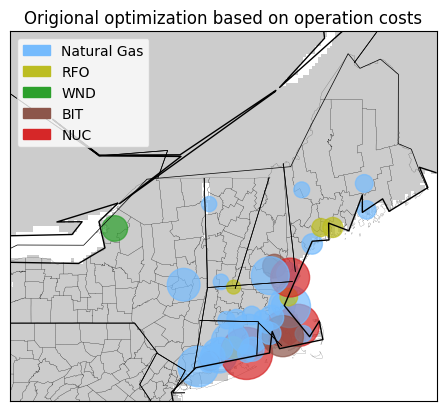

In [28]:
map = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

map.drawcoastlines()
map.drawstates()
# map.drawcoastlines()
map.drawcounties()
map.drawcountries()
map.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)

# first graph based on original

x, y = map(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
map.scatter(x, y, s=gen_og.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)

# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='RFO')
wind = mpatches.Patch(color='tab:green', label='WND')
bit = mpatches.Patch(color='tab:brown', label='BIT')
nuc = mpatches.Patch(color='tab:red', label='NUC')

plt.legend(handles=[natGas,oil,wind,bit,nuc])

# Display the map with plotted data
plt.title('Origional optimization based on operation costs')
plt.show()

/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_42513/1556876615.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  carbon.scatter(x, y, s=gen_carboncost.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)


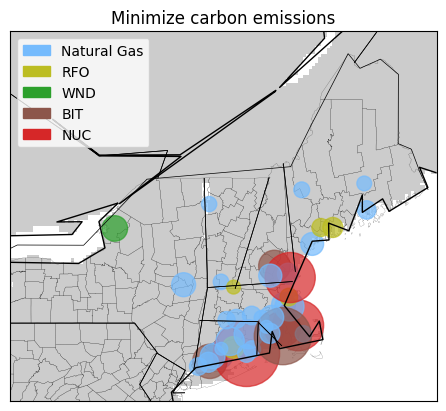

In [29]:
# graphing carbon costs
carbon = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

carbon.drawcoastlines()
carbon.drawstates()
carbon.drawcounties()
carbon.drawcountries()
carbon.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)

# first graph based on original

x, y = carbon(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
carbon.scatter(x, y, s=gen_carboncost.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)

# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='RFO')
wind = mpatches.Patch(color='tab:green', label='WND')
bit = mpatches.Patch(color='tab:brown', label='BIT')
nuc = mpatches.Patch(color='tab:red', label='NUC')

plt.legend(handles=[natGas,oil,wind,bit,nuc])

# Display the map with plotted data
plt.title('Minimize carbon emissions')
plt.show()

/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_42513/2381630111.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  health.scatter(x, y, s=gen_low.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)


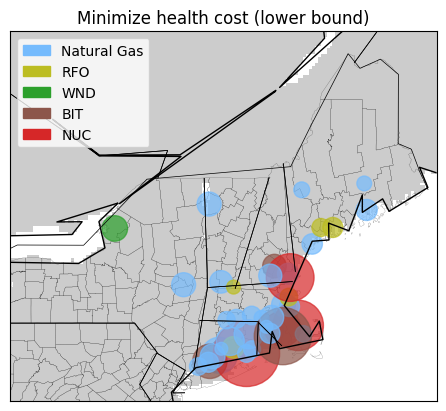

In [30]:
# graphing lower health costs
health = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

health.drawcoastlines()
health.drawstates()
health.drawcounties()
health.drawcountries()
health.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)

# first graph based on original

x, y = health(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
health.scatter(x, y, s=gen_low.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)

# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='RFO')
wind = mpatches.Patch(color='tab:green', label='WND')
bit = mpatches.Patch(color='tab:brown', label='BIT')
nuc = mpatches.Patch(color='tab:red', label='NUC')

plt.legend(handles=[natGas,oil,wind,bit,nuc])

# Display the map with plotted data
plt.title('Minimize health cost (lower bound)')
plt.show()

/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_42513/2782561744.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  health2.scatter(x, y, s=gen_high.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)


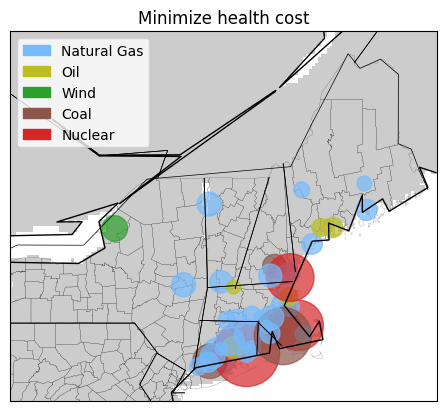

In [83]:
# graphing upper bound health costs
health2 = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

health2.drawcoastlines()
health2.drawstates()
health2.drawcounties()
health2.drawcountries()
health2.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)

# first graph based on original

x, y = health2(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
health2.scatter(x, y, s=gen_high.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)

# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='Oil')
wind = mpatches.Patch(color='tab:green', label='Wind')
bit = mpatches.Patch(color='tab:brown', label='Coal')
nuc = mpatches.Patch(color='tab:red', label='Nuclear')

plt.legend(handles=[natGas,oil,wind,bit,nuc])

# Display the map with plotted data
plt.title('Minimize health cost')
plt.show()

In [57]:
# now plot differences in health cost between health and carbon
gen_diff_low = np.subtract(gen_low['Generation: Lower Health Bound'],gen_carboncost['Generation: Carbon Cost']) / gen_carboncost['Generation: Carbon Cost']

borders_low = []
linewidths_low = []

# print(gen_diff_low)

for i in range(42):
    if(gen_diff_low[i] > 0.05):
        borders_low.append('k')
        linewidths_low.append(2)
    elif(gen_diff_low[i] < -0.05):
        borders_low.append('m')
        linewidths_low.append(2)
    else:
        borders_low.append('y')
        linewidths_low.append(0)
# print("low",gen_low['Generation: Lower Health Bound'])
# print("carb",gen_carboncost['Generation: Coarbon Cost'])
# print(gen_diff_high)

# now plot differences in health cost between health and carbon
gen_diff_high = np.subtract(gen_high['Generation: Upper Health Bound'],gen_carboncost['Generation: Carbon Cost']) / gen_carboncost['Generation: Carbon Cost']

borders_high = []
linewidths_high = []

for i in range(42):
    if(gen_diff_high[i] > 0.05):
        borders_high.append('k')
        linewidths_high.append(2)
    elif(gen_diff_high[i] < -0.05):
        borders_high.append('m')
        linewidths_high.append(2)
    else:
        borders_high.append("y")
        linewidths_high.append(0)

# print("low",gen_low['Generation: Lower Health Bound'])
# print("carb",gen_carboncost['Generation: Coarbon Cost'])
# print(gen_diff_low)

print(borders_low)

['y', 'y', 'k', 'y', 'y', 'y', 'k', 'm', 'k', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'k', 'y', 'm', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'm', 'y', 'm', 'y', 'y', 'y']


/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_42513/3320924119.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  health2.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_low,linewidth=linewidths_low)
/Users/elizabethrogers/anaconda3/envs/summer25/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


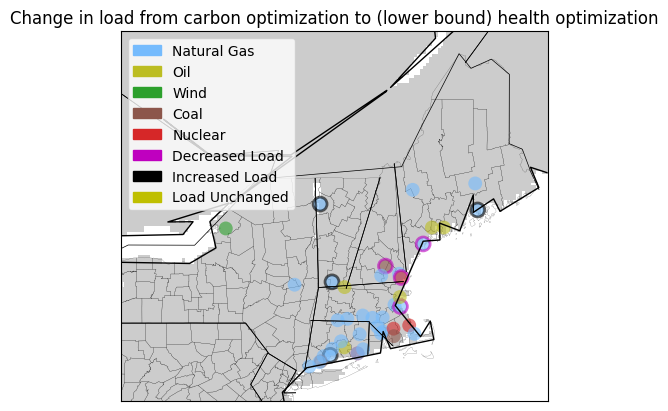

In [86]:

health2 = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

health2.drawcoastlines()
health2.drawstates()
health2.drawcounties()
health2.drawcountries()
health2.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)



# first graph based on original
x, y = health2(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
health2.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_low,linewidth=linewidths_low)
# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='Oil')
wind = mpatches.Patch(color='tab:green', label='Wind')
bit = mpatches.Patch(color='tab:brown', label='Coal')
nuc = mpatches.Patch(color='tab:red', label='Nuclear')
pink = mpatches.Patch(color='m', label='Decreased Load')
black = mpatches.Patch(color='k', label='Increased Load')
yell = mpatches.Patch(color='y', label='Load Unchanged')

plt.legend(handles=[natGas,oil,wind,bit,nuc, pink, black,yell])

# Display the map with plotted data
plt.title('Change in load from carbon optimization to (lower bound) health optimization')
plt.show()

/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_42513/2919342271.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  health_highdiff.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_high,linewidths=linewidths_high)


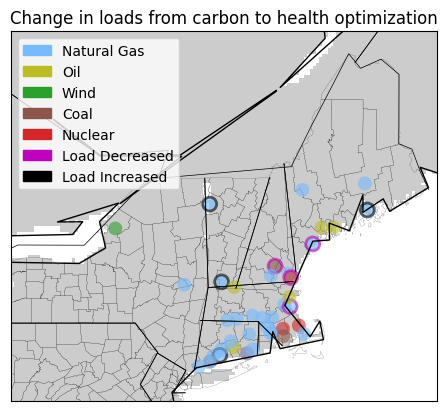

In [85]:
health_highdiff = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

health_highdiff.drawcoastlines()
health_highdiff.drawstates()
health_highdiff.drawcounties()
health_highdiff.drawcountries()
health_highdiff.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)



# first graph based on original
x, y = health_highdiff(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
health_highdiff.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_high,linewidths=linewidths_high)
# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='Oil')
wind = mpatches.Patch(color='tab:green', label='Wind')
bit = mpatches.Patch(color='tab:brown', label='Coal')
nuc = mpatches.Patch(color='tab:red', label='Nuclear')
pink = mpatches.Patch(color='m', label='Load Decreased')
black = mpatches.Patch(color='k', label='Load Increased')

plt.legend(handles=[natGas,oil,wind,bit,nuc, pink, black])

# Display the map with plotted data
plt.title('Change in loads from carbon to health optimization')
plt.show()

In [ ]:
# plot differences in health costs between health and ogiginal
gen_diff_og_low = np.subtract(gen_low['Generation: Lower Health Bound'],gen_og['Generation: Original Model']) / gen_og['Generation: Original Model']

borders_og_low = []

for i in range(42):
    if(gen_diff_og_low[i] > 0.05):
        borders_og_low.append('k')
    elif(gen_diff_high[i] < -0.05):
        borders_og_low.append('m')
    else:
        borders_og_low.append('y')
# print("low",gen_low['Generation: Lower Health Bound'])
# print("carb",gen_carboncost['Generation: Coarbon Cost'])


/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_15118/3104627964.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  health_oglow.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_og_low)
/Users/elizabethrogers/anaconda3/envs/summer25/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


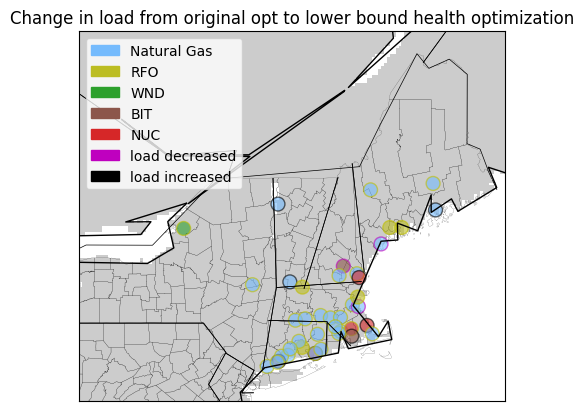

In [ ]:
health_oglow = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

health_oglow.drawcoastlines()
health_oglow.drawstates()
health_oglow.drawcounties()
health_oglow.drawcountries()
health_oglow.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)



# first graph based on original
x, y = health_oglow(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
health_oglow.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_og_low)
# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='RFO')
wind = mpatches.Patch(color='tab:green', label='WND')
bit = mpatches.Patch(color='tab:brown', label='BIT')
nuc = mpatches.Patch(color='tab:red', label='NUC')
pink = mpatches.Patch(color='m', label='load decreased')
black = mpatches.Patch(color='k', label='load increased')

plt.legend(handles=[natGas,oil,wind,bit,nuc, pink, black])

# Display the map with plotted data
plt.title('Change in load from original opt to lower bound health optimization')
plt.show()

In [63]:
# plot differences in health costs between health and ogiginal
gen_diff_og_high = np.subtract(gen_high['Generation: Upper Health Bound'],gen_og['Generation: Original Model']) / gen_og['Generation: Original Model']

borders_og_high = []
linewidth_og_high = []

for i in range(42):
    if(gen_diff_og_high[i] > 0.05):
        borders_og_high.append('k')
        linewidth_og_high.append(2)
    elif(gen_diff_high[i] < -0.05):
        borders_og_high.append('m')
        linewidth_og_high.append(2)
    else:
        borders_og_high.append('y')
        linewidth_og_high.append(0)
# print("low",gen_low['Generation: Lower Health Bound'])
# print("carb",gen_carboncost['Generation: Coarbon Cost'])

/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_42513/2673950481.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  health_oghigh.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_og_high, linewidth=linewidth_og_high)


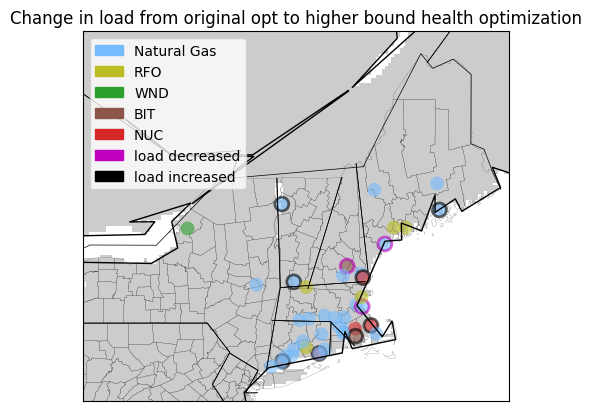

In [87]:
health_oghigh = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

health_oghigh.drawcoastlines()
health_oghigh.drawstates()
health_oghigh.drawcounties()
health_oghigh.drawcountries()
health_oghigh.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)



# first graph based on original
x, y = health_oghigh(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
health_oghigh.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_og_high, linewidth=linewidth_og_high)
# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='RFO')
wind = mpatches.Patch(color='tab:green', label='WND')
bit = mpatches.Patch(color='tab:brown', label='BIT')
nuc = mpatches.Patch(color='tab:red', label='NUC')
pink = mpatches.Patch(color='m', label='load decreased')
black = mpatches.Patch(color='k', label='load increased')

plt.legend(handles=[natGas,oil,wind,bit,nuc, pink, black])

# Display the map with plotted data
plt.title('Change in load from original opt to higher bound health optimization')
plt.show()

In [ ]:
# finding differences in carbon emissions for each optimization
# carb_emission_delt = np.zeros(4)
# emissions rates in tons/MWh
# print(state)

# change emissions rates to be in pounds
BIT_carb = 2.26  / 0.001 /2000
NG_carb = 0.97  / 0.001 / 2000
WND_carb = 0
RFO_carb = 2.46 / 0.001 / 2000
NUC_carb = 0

carbon_rates_emi = np.array([0.000000000000000000e+00,4.849999999999999867e-01,4.849999999999999867e-01,0.000000000000000000e+00,0.000000000000000000e+00,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,1.229999999999999982e+00,4.849999999999999867e-01,0.000000000000000000e+00,4.849999999999999867e-01,0.000000000000000000e+00,4.849999999999999867e-01,1.229999999999999982e+00,1.229999999999999982e+00,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,1.229999999999999982e+00,4.849999999999999867e-01,1.229999999999999982e+00,4.849999999999999867e-01,4.849999999999999867e-01,0.000000000000000000e+00,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,0.000000000000000000e+00,4.849999999999999867e-01,0.000000000000000000e+00,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01])
# print(fuel_type)

# first find emission total of cabron optimization
carbon_emissions_generation = gen_carbonemi['Generation: Carbon Emissions']
# carbon_cost_emi = 0
# for i in range(num_gen):
#     if(fuel_type[i] == 'BIT'):
#         carbon_cost_emi+=gen_carbonemi['Generation: Carbon Emissions'][i] * BIT_carb
#     elif(fuel_type[i] == 'NG'):
#         carbon_cost_emi+=gen_carbonemi['Generation: Carbon Emissions'][i] * NG_carb
#     elif(fuel_type[i] == 'RFO'):
#         carbon_cost_emi+=gen_carbonemi['Generation: Carbon Emissions'][i] * RFO_carb
#     else:
#         continue

carbon_cost_emi = np.inner(carbon_rates_emi.transpose(),carbon_emissions_generation)



print("carbon_cost_emi",carbon_cost_emi) # in lbs of emissions / the one hr
# print(gen_carbonemi)
# print(gen_carboncost)




carbon_cost_emi 4211.879244308084


In [ ]:
# first find emission total of low health optimization
header_name = 'Generation: Lower Health Bound'
lower_health_bound_generation = gen_low['Generation: Lower Health Bound']
# carbon_cost_low = 0

carbon_cost_low = np.inner(carbon_rates_emi.transpose(),lower_health_bound_generation)

print('carbon_cost_low',carbon_cost_low) # in lbs of emissions / the one hr

carbon_cost_low 4394.0180032176495


In [ ]:
# first find emission total of upper health optimization
# print(gen_high[header_name][:])
# gen_og = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116originalGeneratorresults.csv')
# gen_low = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116LowHealthBoundGeneratorresults.csv')
gen_high = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116HighHealthBoundGeneratorresults.csv')
# gen_carboncost = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116carboncostGeneratorresults.csv')
# gen_carbonemi = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116CarbonEMIGeneratorresults.csv')
# print(gen_high[header_name][:])

header_name = 'Generation: Upper Health Bound'
upper_health_bound_generation = gen_high['Generation: Upper Health Bound']
carbon_cost_high = np.inner(carbon_rates_emi.transpose(),upper_health_bound_generation)



print('carbon_cost_high',carbon_cost_high) # in lbs of emissions / the one hr

carbon_cost_high 4394.018003217659


In [ ]:
# first find emission total of regular optimization
header_name = 'Generation: Original Model'
original_model_generation = gen_og['Generation: Original Model']
carbon_cost_og = np.inner(carbon_rates_emi.transpose(),original_model_generation)
# for i in range(num_gen):
#     if(fuel_type[i] == 'BIT'):
#         carbon_cost_og+= gen_og[header_name][i] * BIT_carb
#     elif(fuel_type[i] == 'NG'):
#         carbon_cost_og+=gen_og[header_name][i] * NG_carb
#     elif(fuel_type[i] == 'NUC'):
#         carbon_cost_og+=gen_og[header_name][i] * NUC_carb
#     elif(fuel_type[i] == 'RFO'):
#         carbon_cost_og+=gen_og[header_name][i] * RFO_carb
#     else:
#         carbon_cost_og+=gen_og[header_name][i] * WND_carb


print('carbon_costog',carbon_cost_og) # in lbs of emissions / the one hr

carbon_costog 5797.804700001102


In [79]:
coeffs_health_cost = np.array([0.000000000000000000e+00,5.374672536900214936e+01,-4.258879202568449470e-06,0.000000000000000000e+00,0.000000000000000000e+00,1.169189701311780816e+01,0.000000000000000000e+00,7.347969254867244615e+00,0.000000000000000000e+00,2.542076043310961268e+03,9.431389260927623752e+01,0.000000000000000000e+00,1.468668267041863373e+02,0.000000000000000000e+00,5.060653982471302470e+01,1.171227524920292126e+03,4.100082088022261360e+02,1.198595647552330092e+02,1.198595392008270295e+02,1.198594970009089309e+02,1.209862644920456347e+02,9.431390984294216651e+01,1.305604090928568439e+02,9.200488691929001561e+01,6.529653885703654126e+00,2.969650971777558102e+00,2.902176985004795373e+00,4.653662116344436868e+02,8.309684736472624422e+01,1.176945428711305340e+03,1.033338118520234161e+02,1.033337382918494285e+02,0.000000000000000000e+00,1.139189761288192670e+02,8.812038959164412688e+01,1.139190487363875519e+02,1.758232458888930410e+02,3.725641949835650735e+01,0.000000000000000000e+00,3.887818929506671850e+01,1.169192041151896255e+01,1.169196752778281834e+01])

print(coeffs_health_cost)
print((coeffs_health_cost.shape))

[ 0.00000000e+00  5.37467254e+01 -4.25887920e-06  0.00000000e+00
  0.00000000e+00  1.16918970e+01  0.00000000e+00  7.34796925e+00
  0.00000000e+00  2.54207604e+03  9.43138926e+01  0.00000000e+00
  1.46866827e+02  0.00000000e+00  5.06065398e+01  1.17122752e+03
  4.10008209e+02  1.19859565e+02  1.19859539e+02  1.19859497e+02
  1.20986264e+02  9.43139098e+01  1.30560409e+02  9.20048869e+01
  6.52965389e+00  2.96965097e+00  2.90217699e+00  4.65366212e+02
  8.30968474e+01  1.17694543e+03  1.03333812e+02  1.03333738e+02
  0.00000000e+00  1.13918976e+02  8.81203896e+01  1.13919049e+02
  1.75823246e+02  3.72564195e+01  0.00000000e+00  3.88781893e+01
  1.16919204e+01  1.16919675e+01]
(42,)


In [ ]:
# Find public health cost of carbon optimization
header_name = 'Generation: Carbon Emissions'
carbon_emi_generation = gen_carbonemi['Generation: Carbon Emissions']
# carbon_cost_low = 0

health_cost_carbon= np.inner(coeffs_health_cost.transpose(),carbon_emi_generation)

print('carbon_cost_of_health_high',health_cost_carbon) # in lbs of emissions / the one hr

carbon_cost_low 1616768.5940702176


In [ ]:
# sanity check upper health cost
header_name = 'Generation: Upper Health Bound'
health_high_generation = gen_high[header_name]
# carbon_cost_low = 0

health_cost_high= np.inner(coeffs_health_cost.transpose(),health_high_generation)

print('health_cost_high',health_cost_high) # in lbs of emissions / the one hr

carbon_cost_high 1556465.9028606953


In [82]:
# sanity check upper health cost
header_name = 'Generation: Upper Health Bound'
health_og_generation = gen_og['Generation: Original Model']
# carbon_cost_low = 0

health_cost_og= np.inner(coeffs_health_cost.transpose(),health_og_generation)

print('health_cost_high',health_cost_og) # in lbs of emissions / the one hr

health_cost_high 1843640.7131972348
